<a href="https://colab.research.google.com/github/hajsf/Time-Series-Forecast/blob/main/01_CheckGatheredData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Update pip

In [ ]:
!python.exe -m pip install --upgrade pip

Install required packages

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

Import required packages

In [1]:
import pandas as pd 
import numpy as np
import pickle #no need to install, it is part of the standard library

Ploting libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

**Read the csv files**


*   Define correct seperator, tab in our example
*   Use dtype to enforce data type mainy in casefield field has mix data types
*   Use low_memory=False so you do not mind whatever type the undefined fields are read in they have mix data





In [3]:
path = "data/"

In [59]:
file = '2022Sales'
#file = '2021Sales'
#file = '2020Sales'
#file = '2019Sales'
#file = '20161718Sales'

In [60]:
data = pd.read_csv(path + file + '.csv', sep='\t', lineterminator='\r', low_memory=False) # , dtype={"DATE1": 'string', "SLS_CNTR_ID": "string", "ITEM_ID": "string"}

FileNotFoundError: [Errno 2] No such file or directory: 'data/2022Sales.csv'

Review data structure and scheme

In [47]:
print("number of records:", len(data))
print("data shape:", data.shape) # shape = rows x colums
print(data.head(5)) # print first 5 rows
print(data.tail(5)) # print last 5 rows
print("*** data scheme ***")
print(data.info())  # data scheme

number of records: 2248780
data shape: (2248780, 67)
  ST_TYPE       ST_ID                    DATE1  CUR_ID   SRL   ITEM_ID  \
0    \n58  58012823.0  2021-08-16 00:00:00.000     1.0  28.0    372707   
1    \n58  58012787.0  2021-08-15 00:00:00.000     1.0  20.0    372707   
2    \n58  58012754.0  2021-08-14 00:00:00.000     1.0  21.0    372707   
3    \n58  58001050.0  2021-01-18 00:00:00.000     1.0  24.0  10050399   
4    \n58  58001514.0  2021-01-26 00:00:00.000     1.0   6.0     ms301   

              ITEM_NAME  QTY  FREE_QTY  QTY_ALL  ...             USR_INS_DATE  \
0  ام غيداء ورق عنب مكس  1.0       0.0      1.0  ...  2021-08-17 10:13:58.000   
1  ام غيداء ورق عنب مكس  1.0       0.0      1.0  ...  2021-08-16 10:28:59.000   
2  ام غيداء ورق عنب مكس  1.0       0.0      1.0  ...  2021-08-15 10:38:43.000   
3         فطائر ام فارس  1.0       0.0      1.0  ...  2021-01-19 14:03:04.000   
4    ورق عنب my kitchen  1.0       0.0      1.0  ...  2021-01-27 19:06:39.000   

   USR_UPD  USR

Drop / filter out rows in the dataframe with column ITEM_ID values NA/NAN

In [48]:
cols_to_keep = ['DATE1','SLS_CNTR_ID', 'ITEM_ID', 'QTY', 'TTL_VAL', 'TTL_CST']
# data = data.loc[:, cols_to_keep]
data = data[cols_to_keep]
#data = data.reset_index()
data.head()

,DATE1,SLS_CNTR_ID,ITEM_ID,QTY,TTL_VAL,TTL_CST
0,2021-08-16 00:00:00.000,68.0,372707,1.0,20.0,15.0
1,2021-08-15 00:00:00.000,67.0,372707,1.0,20.0,15.0
2,2021-08-14 00:00:00.000,62.0,372707,1.0,20.0,15.0
3,2021-01-18 00:00:00.000,100.0,10050399,1.0,20.0,15.0
4,2021-01-26 00:00:00.000,67.0,ms301,1.0,20.0,15.0


In [ ]:
data.groupby([pd.TimeGrouper('M'), 'status']).sum()

In [49]:
# Drop rows that has NaN values on selected columns
data = data.dropna(subset=['DATE1','SLS_CNTR_ID', 'ITEM_ID', 'TTL_VAL', 'TTL_CST']) 
# data = data[data['ITEM_ID'].notnull()] # data.head(-1) # will hide last 1 row only
#True

Replace NAN by 0, if something else required then check it case by case

In [50]:
# replace NAN with 0
# If some fields are enforced to be string type, will get error: Cannot set non-string value '0' into a StringArray.
data.replace(np.nan, 0)
True

True

Select the features required from tha data scheme and Convert required fields to the required format

In [51]:
data['DATE1'] = pd.to_datetime(data['DATE1'], format='%Y-%m-%d %H:%M:%S') # format used in the file: '2022-01-01 0:00:00'
data['DATE1'].dt.date # remove time from date
# SLS_CNTER_ID may be read as float, so we need to confirm it is read as integer
data['SLS_CNTR_ID'] = data['SLS_CNTR_ID'].fillna(0).astype(int)
# ITEM_ID is mix of strings and numbers, so same ID (for example 95) could be read as integer and as text,
# which yields to 2 indexed rather than one, so we convert everything to string
data['ITEM_ID'] = data['ITEM_ID'].astype(str)
True

True

In [52]:
# Aggregate to avoid duplicate entry issue
df = data.groupby(['ITEM_ID', 'SLS_CNTR_ID', 'DATE1']).agg({'QTY': "sum", "TTL_VAL":"sum", "TTL_CST":"sum"})
df.sort_index(inplace=True)
#df = df.reset_index()
df.head()
#True

QTY  TTL_VAL  TTL_CST
ITEM_ID SLS_CNTR_ID DATE1                            
0020    13          2021-01-03  1.0     35.0    26.25
                    2021-01-08  1.0     35.0    26.25
                    2021-01-12  1.0     35.0    26.25
                    2021-01-14  1.0     35.0    26.25
                    2021-01-17  1.0     35.0    26.25

In [53]:
df.dtypes

QTY        float64
TTL_VAL    float64
TTL_CST    float64
dtype: object

Test some data to ensure everything is read correctly

In [54]:
df.loc[pd.IndexSlice[:,4],:]

QTY     TTL_VAL  TTL_CST
ITEM_ID    SLS_CNTR_ID DATE1                               
011810029  4           2021-01-09  2.0   60.000000     51.0
0119042512 4           2021-03-26  4.0   72.000000     61.2
                       2021-03-27  1.0   18.000000     15.3
                       2021-03-29  3.0   54.000000     45.9
                       2021-04-01  2.0   36.000000     30.6
...                                ...         ...      ...
z94        4           2021-10-30  4.0  121.739130    100.0
                       2021-10-31  1.0   30.434783     25.0
                       2021-11-01  1.0   30.434783     25.0
                       2021-11-04  1.0   30.434783     25.0
z99        4           2021-01-03  1.0   20.000000     17.0

[113115 rows x 3 columns]

In [55]:
df.loc[('z99',4)]

,QTY,TTL_VAL,TTL_CST
DATE1,,,
2021-01-03,1.0,20.0,17.0


In [39]:
df.loc[('95',13)].sum()

QTY         16.000000
TTL_VAL    112.000000
TTL_CST     70.366944
dtype: float64

In [40]:
df.loc[('z99',4),:].QTY.sum()

162.0

In [56]:
df[df.index.get_level_values('ITEM_ID').isin(['95', 95]) & df.index.get_level_values('SLS_CNTR_ID').isin([4, '4'])].QTY.sum()

32.0

In [57]:
# level 0 is the first index, in our case it is ITEM_ID
x = df[df.index.isin(['95', 'z94'], level='ITEM_ID')]  # Filter dataframe where ITEM_ID is either 95 or z94
# x = df[df.index.isin(['95', 'z94'], level=0)]  # level can be defined by either string or index int
y = df[~df.index.isin(['95', 'z94'], level=0)] # Filter dataframe where ITEM_ID is neither 95 nor z94
print(len(x), " + ", len(y), " = ", len(df))

676  +  1894137  =  1894813


Save to pickle

In [58]:
with open(path + file + '.pk', 'wb') as f:
  pickle.dump(df, f)

In [44]:
df

QTY    TTL_VAL  TTL_CST
ITEM_ID  SLS_CNTR_ID DATE1                              
00110024 1           2020-07-22  1.0  46.086950    32.25
                     2020-09-10  1.0  46.086950    32.25
                     2020-09-16  1.0  46.086950    32.25
                     2020-09-18  1.0  46.086950    32.25
                     2020-09-20  0.0  -4.608695     0.00
...                              ...        ...      ...
z99      18          2020-09-12  4.0  80.000000    68.00
                     2020-09-17  1.0  20.000000    17.00
                     2020-09-18  3.0  60.000000    51.00
                     2020-09-23  2.0  40.000000    34.00
                     2020-09-24  3.0  60.000000    51.00

[1762154 rows x 3 columns]

Filter df with some data

In [39]:
mask = df[(df.index.isin(['95', 'z94'], level=0)) & 
          ((df.index.get_level_values('DATE1').dayofweek == 4) | (df.index.get_level_values('DATE1').dayofweek == 5)
          )] # Monday=0, Sunday=6
#mask = df[~df.index.get_level_values('ITEM_ID').isin(['95', 'z94'])]

In [40]:
table = mask.pivot_table(
        values='QTY', 
        index=['ITEM_ID'],
       # columns=['SLS_CNTR_ID'],
       columns=['DATE1'], 
        aggfunc='sum', 
    )
# replace NAN with 0
table = table.replace(np.nan, 0)
table

# Numbers format can be done also as:
#with pd.option_context('display.float_format', '#{:0.2f}'.format):
#  print(table)

DATE1,2016-03-05,2016-04-23,2016-04-29,2016-04-30,2016-05-06,2016-05-07,2016-05-13,2016-05-14,2016-05-21,2017-09-29,...,2018-11-30,2018-12-01,2018-12-07,2018-12-08,2018-12-14,2018-12-15,2018-12-21,2018-12-22,2018-12-28,2018-12-29
ITEM_ID,,,,,,,,,,,,,,,,,,,,,
95,2.0,1.0,3.0,6.0,1.0,4.0,5.0,3.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,69.0
z94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,11.0,8.0,8.0,5.0,9.0,4.0,4.0,8.0,13.0


<AxesSubplot:xlabel='DATE1', ylabel='QTY'>

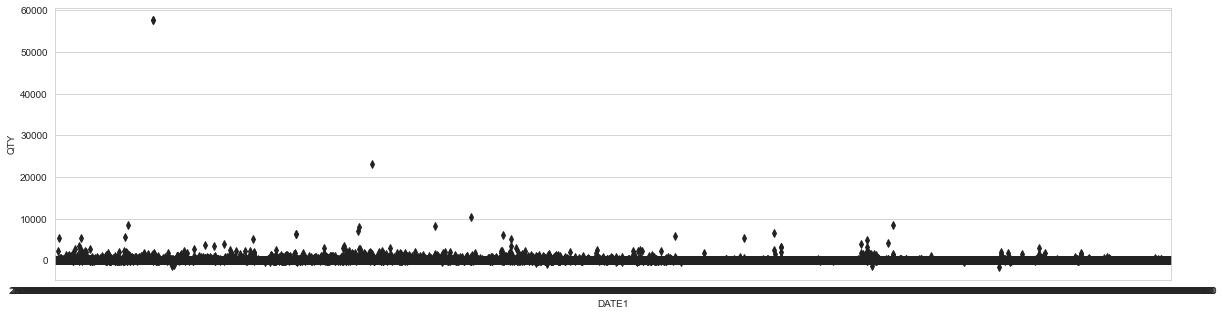

In [50]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [20, 5] #  [width, height]  
sns.boxplot(x = df.index.get_level_values('DATE1'),  # ('SLS_CNTR_ID')
            y = 'QTY',
            data = df, palette="Blues", width=0.3)

<AxesSubplot:xlabel='DATE1', ylabel='QTY'>

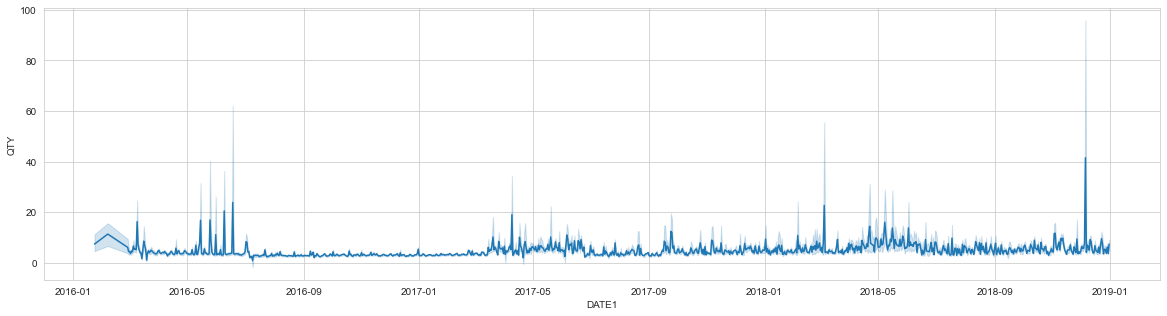

In [49]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [20, 5] #  [width, height]  
sns.lineplot(x = df.index.get_level_values('DATE1'),  # ('SLS_CNTR_ID')
            y = 'QTY',
            data = df)

In [52]:
#mask = df[df.index.get_level_values('ITEM_ID').isin(['95', 'z94'])]
mask = df
ax = mask.unstack(level='SLS_CNTR_ID').plot(kind='bar', subplots=True, rot=0, figsize=(18, 4), layout=(7, 10))
plt.tight_layout()